### Newton Divided Difference (Markdown Version)

Interpolasi Newton membentuk polinomial:

$
P(x) = b_0 + b_1(x - x_0) + b_2(x - x_0)(x - x_1) + b_3(x - x_0)(x - x_1)(x - x_2) + \cdots
$

di mana koefisien $ b_i $ dihitung sebagai berikut:

- $ b_0 = f[x_0] = y_0 $
- $ b_1 = f[x_0,x_1] = \frac{y_1 - y_0}{x_1 - x_0} $
- $ b_2 = f[x_0,x_1,x_2] = \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2 - x_0} $
- $ b_3 = f[x_0,x_1,x_2,x_3] = \frac{f[x_1,x_2,x_3] - f[x_0,x_1,x_2]}{x_3 - x_0} $

dan seterusnya.

---

**Divided difference secara umum:**

- Tingkat 1:
  $
  f[x_i,x_{i+1}] = \frac{f[x_{i+1}] - f[x_i]}{x_{i+1} - x_i}
  $
- Tingkat 2:
  $
  f[x_i,x_{i+1},x_{i+2}] = \frac{f[x_{i+1},x_{i+2}] - f[x_i,x_{i+1}]}{x_{i+2} - x_i}
  $
- Tingkat 3:
  $
  f[x_i,x_{i+1},x_{i+2},x_{i+3}] = \frac{f[x_{i+1},x_{i+2},x_{i+3}] - f[x_i,x_{i+1},x_{i+2}]}{x_{i+3} - x_i}
  $
- dan seterusnya.



## Soal

| x | f(x) |
| --- | --- |
| 4 | 23.70 |
| 9 | 198.45 |
| 12 | 342.90 |
| 19 | 1206.25 |

Cari berapa $ f(14) $ ?

In [ ]:
%pip install numpy matplotlib tabulate

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('seaborn-poster')

%matplotlib inline

In [26]:
def divided_difference(x, y):
    """
    Membuat tabel divided difference dan mengembalikan koefisien Newton.
    """
    n = len(x)
    coef = [y[i] for i in range(n)]  # copy y

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])
    
    return np.round(coef,2)

def newton_polynomial(x_data, coef, x):
    """
    Menghitung nilai polinomial Newton di titik x.
    """
    n = len(coef) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k]) * p
    return p

In [32]:
x = np.array([4, 9, 12, 19])
y = np.array([23.70, 198.45, 342.90, 1206.25])
# get the divided difference coef
coef = divided_difference(x, y)


# Cetak koefisien
print("Koefisien Newton Divided Difference:")
for i, c in enumerate(coef):
    print(f"b{i} = {c}")


x_value = 14
result = newton_polynomial(x, coef, x_value)
print(f"\nHasil interpolasi di x = {x_value} adalah {result}")

Koefisien Newton Divided Difference:
b0 = 23.7
b1 = 34.95
b2 = 1.65
b3 = 0.39

Hasil interpolasi di x = 14 adalah 494.7


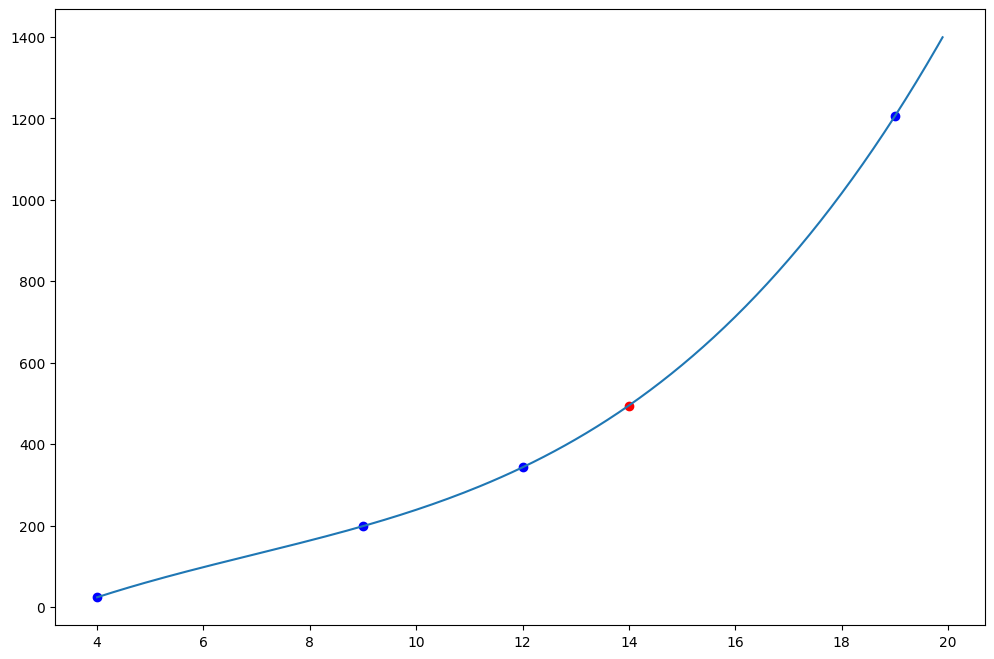

In [40]:
# evaluate on new data points
x_new = np.arange(4, 20, .1)
y_new = newton_poly(coef, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_value, result, 'ro')
plt.plot(x_new, y_new)